In [2]:
# Import SparkConf class into program
from pyspark import SparkConf
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, when, count, col


# 1.1

In [6]:
# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "My spark assignment_2 "
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)


In [7]:
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')
                                  #### spark initialization

In [8]:
spark.sql("set spark.sql.files.maxPartitionBytes = 13421779")

DataFrame[key: string, value: string]

In [9]:
path_1 = ['linux_memory_1.csv','linux_memory_2.csv']
df_memory =  spark.read.option("header", "true").option("inferSchema", "true").csv(path_1)                  #### load  all csv files by passing a list of paths of files

In [10]:
path_2 = ['linux_process_1.csv','linux_process_2.csv']
df_process =  spark.read.option("header", "true").option("inferSchema", "true").csv(path_2)                  #### load  all csv files by passing a list of paths of files

In [11]:
#df_memory.rdd.getNumPartitions()
df_process.rdd.getNumPartitions()


10

# 1.2 

### 1.2.1

In [12]:
df_memory.printSchema()

root
 |-- ts: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- MINFLT: string (nullable = true)
 |-- MAJFLT: string (nullable = true)
 |-- VSTEXT: string (nullable = true)
 |-- VSIZE: double (nullable = true)
 |-- RSIZE: string (nullable = true)
 |-- VGROW: string (nullable = true)
 |-- RGROW: string (nullable = true)
 |-- MEM: double (nullable = true)
 |-- CMD: string (nullable = true)
 |-- attack: integer (nullable = true)
 |-- type: string (nullable = true)



In [13]:
df_process.printSchema()

root
 |-- ts: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- TRUN: integer (nullable = true)
 |-- TSLPI: integer (nullable = true)
 |-- TSLPU: integer (nullable = true)
 |-- POLI: string (nullable = true)
 |-- NICE: integer (nullable = true)
 |-- PRI: integer (nullable = true)
 |-- RTPR: integer (nullable = true)
 |-- CPUNR: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- EXC: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- CPU: double (nullable = true)
 |-- CMD: string (nullable = true)
 |-- attack: integer (nullable = true)
 |-- type: string (nullable = true)



In [14]:
#### cache dataframes 

df_memory = df_memory.cache()
df_process = df_process.cache()

In [15]:
####  print number of rows 

print(df_memory.count())

print(df_process.count())

2000000
1927968


### 1.2.2 

In [16]:
##### checking for any null values and print the no of null values
df_memory.select([count(when(col(c).isNull(), c)).alias(c) for c in df_memory.columns]).show()


df_process.select([count(when(col(c).isNull(), c)).alias(c) for c in df_process.columns]).show()

+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+
| ts|PID|MINFLT|MAJFLT|VSTEXT|VSIZE|RSIZE|VGROW|RGROW|MEM|CMD|attack|type|
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+
|  0|  0|     0|     0|     0|    0|    0|    0|    0|  0|  0|     0|   0|
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+

+---+---+----+-----+-----+----+----+---+----+-----+------+---+-----+---+---+------+----+
| ts|PID|TRUN|TSLPI|TSLPU|POLI|NICE|PRI|RTPR|CPUNR|Status|EXC|State|CPU|CMD|attack|type|
+---+---+----+-----+-----+----+----+---+----+-----+------+---+-----+---+---+------+----+
|  0|  0|   0|    0|    0|   0|   0|  0|   0|    0|     0|  0|    0|  0|  0|     0|   0|
+---+---+----+-----+-----+----+----+---+----+-----+------+---+-----+---+---+------+----+



In [17]:
df_memory = df_memory.withColumn("MINFLT", regexp_replace("MINFLT", 'K', '000'))

df_memory = df_memory.withColumn("MAJFLT", regexp_replace("MAJFLT", 'K', '000'))
df_memory = df_memory.withColumn("MAJFLT", regexp_replace("MAJFLT", '224.2M', '224200000'))

df_memory = df_memory.withColumn("VSTEXT", regexp_replace("VSTEXT", 'K', '000'))
df_memory = df_memory.withColumn("VSTEXT", regexp_replace("VSTEXT", '224.2M', '224200000'))

df_memory = df_memory.withColumn("RSIZE", regexp_replace("RSIZE", 'K', '000'))
df_memory = df_memory.withColumn("RSIZE", regexp_replace("RSIZE", '224.2M', '224200000'))

df_memory = df_memory.withColumn("VGROW", regexp_replace("VGROW", 'K', '000'))
df_memory = df_memory.withColumn("VGROW", regexp_replace("VGROW", ' ',''))
df_memory = df_memory.withColumn("VGROW", regexp_replace("VGROW", '224.2M', '224200000'))


df_memory = df_memory.withColumn("RGROW", regexp_replace("RGROW", 'K', '000'))
df_memory = df_memory.withColumn("RGROW", regexp_replace("RGROW", '224.2M', '224200000'))







In [18]:
#### converting the below columns to appropriaye datatype as per metadata

df_memory = df_memory.withColumn("MINFLT", df_memory["MINFLT"].cast(DoubleType()))
df_memory = df_memory.withColumn("MAJFLT", df_memory["MAJFLT"].cast(DoubleType()))
df_memory = df_memory.withColumn("VSTEXT", df_memory["VSTEXT"].cast(DoubleType()))
df_memory = df_memory.withColumn("RSIZE", df_memory["RSIZE"].cast(DoubleType()))
df_memory = df_memory.withColumn("VGROW",df_memory["VGROW"].cast(DoubleType()))
df_memory = df_memory.withColumn("RGROW",df_memory["RGROW"].cast(DoubleType()))









In [19]:
df_memory.select([count(when(col(c).isNull(), c)).alias(c) for c in df_memory.columns]).show()
#### check for null values 

+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+
| ts|PID|MINFLT|MAJFLT|VSTEXT|VSIZE|RSIZE|VGROW|RGROW|MEM|CMD|attack|type|
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+
|  0|  0|     0|  2626|     0|    0|    3|    0|    0|  0|  0|     0|   0|
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+



# 1.3

###  1.3.1

In [20]:
#### count no of attacks and no attacks from each activity  i.e memory and process

df_memory.groupBy("attack").count().show()


df_process.groupBy("attack").count().show()


+------+-------+
|attack|  count|
+------+-------+
|     1| 205623|
|     0|1794377|
+------+-------+

+------+-------+
|attack|  count|
+------+-------+
|     1| 291364|
|     0|1636604|
+------+-------+



In [21]:
#### count no of different types  attacks from each activity  i.e memory and process

df_memory.groupBy("type").count().show()


df_process.groupBy("type").count().show()


+---------+-------+
|     type|  count|
+---------+-------+
| password|  26016|
|     ddos|  45689|
|   normal|1794377|
|     mitm|    112|
|injection|  58523|
|      dos|  75283|
+---------+-------+

+---------+-------+
|     type|  count|
+---------+-------+
|      xss|  17759|
| password|  51409|
| scanning|  38449|
|     ddos|  71603|
|   normal|1636604|
|     mitm|    112|
|injection|  41311|
|      dos|  70721|
+---------+-------+



###  1.3.2

In [22]:
## dividing numerical and categorical into different daatframes for each process
# Activity: Memory 

mem_num_cols = [x.name for x in df_memory.schema.fields if isinstance(x.dataType, StringType) == False and x.name != 'attack']

# check datatype of each column and select only numerical columns


mem_cat_cols = [x for x in df_memory.columns if x not in mem_num_cols and x != "attack" and x != 'type']

# select a list of columns not in the numerical column list from the list of all columns

# Activity: Process 

proc_num_cols = [x.name for x in df_process.schema.fields if isinstance(x.dataType, StringType) == False and x.name != 'attack']


proc_cat_cols = [x for x in df_process.columns if x not in proc_num_cols and x != "attack" and x != 'type']

print(mem_num_cols ,mem_cat_cols,proc_num_cols,proc_cat_cols,sep ='\n')

['ts', 'PID', 'MINFLT', 'MAJFLT', 'VSTEXT', 'VSIZE', 'RSIZE', 'VGROW', 'RGROW', 'MEM']
['CMD']
['ts', 'PID', 'TRUN', 'TSLPI', 'TSLPU', 'NICE', 'PRI', 'RTPR', 'CPUNR', 'EXC', 'CPU']
['POLI', 'Status', 'State', 'CMD']


In [23]:
##Create dataframes of numerical and categorical columns for each activity 
### STATISTICS FOR NUMERICAL COLUMNS FOR EACH ACTIVITY#

df_memory_num  = df_memory[mem_num_cols]

df_process_num = df_process[proc_num_cols]

df_memory_num.describe().show()

df_process_num.describe().show()

+-------+------------------+-----------------+------------------+--------------------+-----------------+-----------------+------------------+-----------------+-----------------+--------------------+
|summary|                ts|              PID|            MINFLT|              MAJFLT|           VSTEXT|            VSIZE|             RSIZE|            VGROW|            RGROW|                 MEM|
+-------+------------------+-----------------+------------------+--------------------+-----------------+-----------------+------------------+-----------------+-----------------+--------------------+
|  count|           2000000|          2000000|           2000000|             1997374|          2000000|          2000000|           1999997|          2000000|          2000000|             2000000|
|   mean|1.55624581707609E9|      4999.360446|        983.344344|   694120.7678954597|46453.27415209577| 4496.41996645148|23386.323743685076|984.4668735599992|     483.17466255|0.003385164999998...|
| std

In [24]:
#### Statistics of categorical columns 

df_memory_cat  = df_memory[mem_cat_cols]

df_process_cat = df_process[proc_cat_cols]

for i in df_memory_cat.columns:
    df_memory_cat.select(i).groupBy(i).count().show(10)
    
    
for i in df_process_cat.columns:
    df_process_cat.select(i).groupBy(i).count().show(10)

+--------------+-----+
|           CMD|count|
+--------------+-----+
|        <kmod>|    6|
|         jfsIO|13619|
|kworker/4:2-mm|  147|
|     <dumpcap>|   18|
|        <fsck>|  192|
|    <basename>|   45|
|<kworker/dyin>|  603|
|<rsyslog-rota>|    3|
|ibus-extension| 5788|
|       <iconv>|    1|
+--------------+-----+
only showing top 10 rows

+----+-------+
|POLI|  count|
+----+-------+
|norm|1861558|
|   0|  53216|
|   -|  13194|
+----+-------+

+------+-------+
|Status|  count|
+------+-------+
|    NS|    743|
|     0| 438984|
|    NE|  48602|
|    NC|      1|
|     C|      3|
|     -|1416322|
|     N|  23313|
+------+-------+

+-----+-------+
|State|  count|
+-----+-------+
|    E|  66410|
|    T|      7|
|    D|    344|
|    Z|   1118|
|    S|1676350|
|    R|  84753|
|    I|  98986|
+-----+-------+

+--------------+-----+
|           CMD|count|
+--------------+-----+
|        <kmod>|    6|
|         jfsIO|    2|
|kworker/4:2-mm|  510|
|     <dumpcap>|   18|
|        <fsck>|  19

### 1.3.3

<AxesSubplot:>

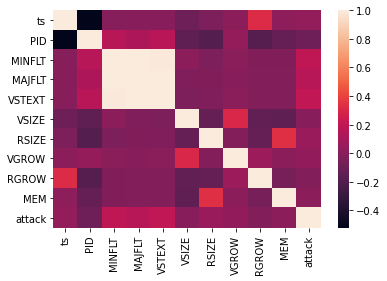

In [25]:
##### VISUALIZATION 
###  Correlation heat map matrix of  columns for each ACTIVITY to show correlation between target and factor variables 



#### Activity : Memory


#! pip install seaborn       # install seaborn package for visualization
import pandas as pd
import seaborn as sns
df_memory_pandas = df_memory.toPandas()          # convert to pandas dataframe for plotting
df_memory_pandas_sample = df_memory_pandas.sample(10000)  #sample the dataframe for easier plotting 
correlations = df_memory_pandas_sample.corr()
#print(correlations)         # print correlation matrix 
sns.heatmap(correlations)







<AxesSubplot:>

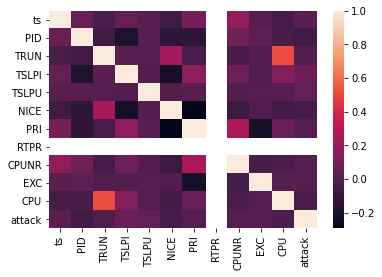

In [26]:
#### Activity : Process

import seaborn as sns

df_process_pandas = df_process.toPandas()          # convert to pandas dataframe for plotting
df_process_pandas_sample = df_process_pandas.sample(10000)  #sample the dataframe for easier plotting 
correlations_1 = df_process_pandas_sample.corr()
#print(correlations)         # print correlation matrix 
sns.heatmap(correlations_1)



### Activity : Memory
In the above correlation heat map  we find that all columns are equally correlated to target variable "attack" , however we find that  column "MAJFLT" and column "VSTEXT" are highly correlated with each other . There is significant  correlation between "ts" and "PID" and also between columns "RSIZE" and "VGROW" 

### Activity : Process
In the second heatmap we find that there is  significant correlation between column "CPU" and "TRUN"

# Grouped Bar plots for analysis of categorical variables


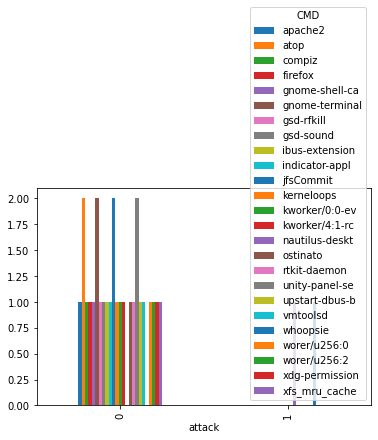

In [27]:
df_bar_graph = df_memory.select("CMD","attack").sample(False , .00001 , 1234).groupBy("CMD","attack").count()
df_bar_graph_new = df_bar_graph.toPandas()
df_bar_graph_new.pivot("attack", "CMD", "count").plot(kind='bar')

plt.show()

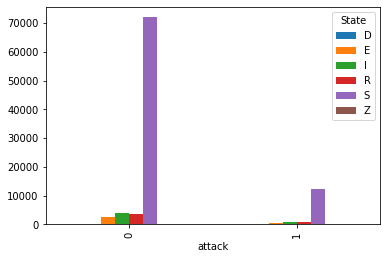

In [28]:
df_bar_graph_1 = df_process.select("State","attack").sample(False , .05 , 1234).groupBy("State","attack").count()
df_bar_graph_new_1 = df_bar_graph_1.toPandas()
df_bar_graph_new_1.pivot("attack", "State", "count").plot(kind='bar')

plt.show()

This plot shows that processes in sleeping state "S" was associated with attacks

# 2  :    Feature extraction and ML Training

###  2.1    :   Preparing the training and testing data

### 2.1.1

In [29]:
### splitting training and testing data for each activity : 

## Activity :  Memory 

memory_train, memory_test = df_memory.randomSplit([0.8, 0.2])

In [30]:
memory_train.groupBy("attack").count().show()

+------+-------+
|attack|  count|
+------+-------+
|     1| 164321|
|     0|1434896|
+------+-------+



#### 2.1.2 Rebalancing the training data for each activity , Activity : Memory

In [31]:
### In order to rebalance training data , we first split the original dataframe by 80/20 on train and test 
##  we then subset  the training  data into "attack" and "non attack" dataframes 
# we then sample randomly for 20% of the dataframe containing " attack" rows and to maintain 1:2 ratio, we have twice the number of "attack records "

In [32]:
# create dataframe for attack records only 
df_attack_memory = memory_train.filter(memory_train["attack"] == 1)
print(df_attack_memory.count())

164321


In [33]:
df_attack_memory_sample = df_attack_memory.sample(False , .2 , 1234)
#print the no of records
print(df_attack_memory_sample.count())

33050


In [34]:
### create dataframe for non attack records
df_non_attack_memory = memory_train.filter(memory_train["attack"] == 0)

sampling_ratio = (df_attack_memory_sample.count()*2)/(df_non_attack_memory.count())   ### since 1:2 ratio of attack and non attack find the req ratio of sampling of "non attack"  records dataframe  
#sampling_ratio = round(sampling_ratio,2)
print(sampling_ratio)

0.0460660563553038


In [35]:
### now sample the "non attack dataframe" 
df_non_attack_memory_sample = df_non_attack_memory.sample(False ,0.05, 124)
#print the no of records to check if they are in 1:2 ratio
print(df_non_attack_memory_sample.count())

71730


In [36]:
train_memory = df_attack_memory_sample.unionAll(df_non_attack_memory_sample)   # final rebalanced training data
train_memory.groupBy("attack").count().show()           #### print to check if the attack and non attack events are close in 1:2 ratio

+------+-----+
|attack|count|
+------+-----+
|     1|33050|
|     0|71730|
+------+-----+



#### Rebalance training data for activity: Process

In [37]:
process_train, process_test = df_process.randomSplit([0.8, 0.2])

In [38]:
process_train.groupBy("attack").count().show()

+------+-------+
|attack|  count|
+------+-------+
|     1| 233199|
|     0|1309386|
+------+-------+



In [39]:
process_test.count()

385383

In [40]:
# create dataframe for attack records only 
df_attack_process = process_train.filter(process_train["attack"] == 1)
print(df_attack_process.count())

233199


In [41]:
df_attack_process_sample = df_attack_process.sample(False , .2 , 144)
#print the no of records
print(df_attack_process_sample.count())

46921


In [42]:
### create dataframe for non attack records
df_non_attack_process = process_train.filter(process_train["attack"] == 0)

sampling_ratio_1= (df_attack_process_sample.count()*2)/(df_non_attack_process.count())   ### since 1:2 ratio of attack and non attack find the req ratio of sampling of "non attack"  records dataframe  
#sampling_ratio = round(sampling_ratio,2)
print(sampling_ratio_1)

0.07166870579034754


In [43]:
### now sample the "non attack dataframe" 
df_non_attack_process_sample = df_non_attack_process.sample(False ,0.07, 1234)
#print the no of records to check if they are in 1:2 ratio
print(df_non_attack_process_sample.count())

91613


In [44]:
train_process = df_attack_process_sample.unionAll(df_non_attack_process_sample)   # final rebalanced training data
train_process.groupBy("attack").count().show()           #### print to check if the attack and non attack events are close in 1:2 ratio

+------+-----+
|attack|count|
+------+-----+
|     1|46921|
|     0|91613|
+------+-----+



# 2.2 : Preparing features , labels and models

### 2.2.1 

### Activity : Memory
For this activity , we drop one of the columns which are highly correlated with each other and we drop column "CMD" as it is a categorical variable with different names of processes which is not very useful. we drop columns " VGROW" , "MAJFLT" as they are highly correlated with columns "RSIZE" "VSTEXT " RESPECTIVELY .We also drop column "PID" because it a random unique number generated for each process  and does not make sense as a feature .  we also drop "ts" because it the timme at whihc the process was started.

Scaling and Transformation: In this process we scale "MINFLT" ,"RSIZE" AND "VSEXT" by dividing the values by 1000 . No transformation required 

### Activity : Process 
We drop columns "PID" , " ts" and "CMD" as they are not relevant . We also drop "RTPR"  the entire column has value zeros . We also drop column "CPU" since it is signifacantly correlated with "TRUN"

Scaling and Transformation : No scaling required however , we need to use string indexers and one hot encoding on categorical columns "POLI" , "state" , "status" 


### 2.2.2

### Pipline setup for each activity

## 1) Activity :  Memory  , Pipeline_1 : Decision tree

In [38]:
# creating two seperate pipelines in stages

from pyspark.ml import Pipeline                  # import modules required
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import MinMaxScaler

In [39]:

## prepare pipeline 


inputCols= ['MINFLT', 'VSTEXT', 'VSIZE', 'RSIZE', 'RGROW', 'MEM']                   # give considered input cols
vec_ass = VectorAssembler(inputCols = inputCols ,outputCol="features")        # combine all numerical columns into one vector


scaler = MinMaxScaler(inputCol="features", outputCol="features_scaled")


from pyspark.ml.classification import DecisionTreeClassifier

# Extracts the number of nodes in the decision tree and the tree depth in the model and stores it in dt.

stage_decision_tree = DecisionTreeClassifier(featuresCol = 'features_scaled', labelCol = 'attack', maxDepth = 3)



In [40]:
pipeline_1_m = Pipeline(stages=[vec_ass,scaler,stage_decision_tree])
model_dt_m = pipeline_1_m.fit(train_memory)
# Make predictions on test documents and print columns of interest.
pred_dt_m = model_dt_m.transform(memory_test)



In [41]:
# Calculate the elements of the confusion matrix
TN = pred_dt_m.filter('prediction = 0 AND attack = 0').count()
TP = pred_dt_m.filter('prediction = 1 AND attack = 1').count()
FN = pred_dt_m.filter('prediction = 0 AND attack = 1').count()#WRITE CODE to find the False Negative
FP = pred_dt_m.filter('prediction = 1 AND attack = 0').count()#WRITE CODE to find the False Positive

# show confusion matrix
pred_dt_m.groupBy('attack', 'prediction').count().show()
# calculate metrics by the confusion matrix
accuracy = (TP+TN)/(TP+TN+FP+FN)#WRITE CODE : formula to find accuracy
precision = TP/(TP+FP)#WRITE CODE : formula to find precision
recall = TP/(TP+FN)#WRITE CODE : formula to find recall
f1 = 2/((1/recall) + (1/precision))#WRITE CODE : formula to find F1-score

#WRITE CODE : Display the various metrics calculated above
print("Decision Tree metrics")
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-1 Score: " + str(f1))

+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 38171|
|     0|       0.0|353576|
|     1|       1.0|  3093|
|     0|       1.0|  4583|
+------+----------+------+

Decision Tree metrics
Accuracy: 0.8929605956592385
Precision: 0.4029442417926003
Recall: 0.0749563784412563
F-1 Score: 0.12639967306906416


## Pipeline_2 for Gradient Boosted Tree model , activity: memory

In [42]:
from pyspark.ml.classification import GBTClassifier
#Extracts the number of nodes in the decision tree and the tree depth in the model and stores it in dt.

gbt_memory = GBTClassifier(featuresCol = 'features_scaled', labelCol = 'attack', maxIter = 5)


In [43]:
pipeline_2_m = Pipeline(stages=[vec_ass,scaler,gbt_memory])
model_gbt_m = pipeline_2_m.fit(train_memory)
pred_gbt_m = model_gbt_m.transform(memory_test)

In [44]:
# Calculate the elements of the confusion matrix
TN = pred_gbt_m.filter('prediction = 0 AND attack = 0').count()
TP = pred_gbt_m.filter('prediction = 1 AND attack = 1').count()
FN = pred_gbt_m.filter('prediction = 0 AND attack = 1').count()#WRITE CODE to find the False Negative
FP = pred_gbt_m.filter('prediction = 1 AND attack = 0').count()#WRITE CODE to find the False Positive

# show confusion matrix
pred_gbt_m.groupBy('attack', 'prediction').count().show()
# calculate metrics by the confusion matrix
accuracy = (TP+TN)/(TP+TN+FP+FN)#WRITE CODE : formula to find accuracy
precision = TP/(TP+FP)#WRITE CODE : formula to find precision
recall = TP/(TP+FN)#WRITE CODE : formula to find recall
f1 = 2/((1/recall) + (1/precision))#WRITE CODE : formula to find F1-score

#WRITE CODE : Display the various metrics calculated above
print("Gradient boost Tree metrics")
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-1 Score: " + str(f1))

+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 24327|
|     0|       0.0|323215|
|     1|       1.0| 16937|
|     0|       1.0| 34944|
+------+----------+------+

Gradient boost Tree metrics
Accuracy: 0.8516084451821753
Precision: 0.3264586264721189
Recall: 0.41045463357890655
F-1 Score: 0.3636695474797359


## 2) Activity :  Process  , Pipeline_1 : Decision tree

In [18]:
input_columns_p = ['POLI','State']
output_columns_p= [f'{x}_index' for x in input_columns_p]
stage_1 = StringIndexer(inputCols = input_columns_p, outputCols = output_columns_p) 

inputCols_OHE = [x for x in output_columns_p]
outputCols_OHE = [f'{x}_vec' for x in inputCols_OHE]
stage_2 = OneHotEncoder(inputCols=inputCols_OHE,outputCols=outputCols_OHE)



inputCols= [x for x in outputCols_OHE] + ['TRUN', 'TSLPI', 'TSLPU', 'NICE', 'PRI', 'CPUNR', 'EXC']
stage_3 = VectorAssembler(inputCols=inputCols,outputCol="features")


scaler = MinMaxScaler(inputCol="features", outputCol="features_scaled")




In [19]:
from pyspark.ml.classification import DecisionTreeClassifier

# Extracts the number of nodes in the decision tree and the tree depth in the model and stores it in dt.

stage_decision_tree = DecisionTreeClassifier(featuresCol = 'features_scaled', labelCol = 'attack', maxDepth = 3)


## 2.3 

### 2.3.1

In [20]:
pipeline_1_p = Pipeline(stages=[stage_1,stage_2,stage_3,scaler,stage_decision_tree])
model_dt_p= pipeline_1_p.fit(train_process)
# Make predictions on test documents and print columns of interest.
pred_dt_p = model_dt_p.transform(process_test)



### 2.3.2

In [21]:
# Calculate the elements of the confusion matrix
TN = pred_dt_p.filter('prediction = 0 AND attack = 0').count()
TP = pred_dt_p.filter('prediction = 1 AND attack = 1').count()
FN = pred_dt_p.filter('prediction = 0 AND attack = 1').count()#WRITE CODE to find the False Negative
FP = pred_dt_p.filter('prediction = 1 AND attack = 0').count()#WRITE CODE to find the False Positive

# show confusion matrix
pred_dt_p.groupBy('attack', 'prediction').count().show()
# calculate metrics by the confusion matrix
accuracy = (TP+TN)/(TP+TN+FP+FN)#WRITE CODE : formula to find accuracy
precision = TP/(TP+FP)#WRITE CODE : formula to find precision
recall = TP/(TP+FN)#WRITE CODE : formula to find recall
f1 = 2/((1/recall) + (1/precision))#WRITE CODE : formula to find F1-score

#WRITE CODE : Display the various metrics calculated above
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-1 Score: " + str(f1))

+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 56750|
|     0|       0.0|324540|
|     1|       1.0|  1641|
|     0|       1.0|  3533|
+------+----------+------+

Accuracy: 0.8440139314399271
Precision: 0.3171627367607267
Recall: 0.028103646109845695
F-1 Score: 0.05163218752458114


## Pipeline_2 for Gradient Boosted Tree model , activity: process

In [23]:
from pyspark.ml.classification import GBTClassifier

gbt_process = GBTClassifier(featuresCol = 'features_scaled', labelCol = 'attack', maxIter = 5)
pipeline_2_p = Pipeline(stages=[stage_1,stage_2,stage_3,scaler,gbt_process])
model_gbt_p= pipeline_2_p.fit(train_process)


In [24]:
# Make predictions on test documents and print columns of interest.
pred_gbt_p =  model_gbt_p.transform(process_test)

In [25]:
# Calculate the elements of the confusion matrix
TN = pred_gbt_p.filter('prediction = 0 AND attack = 0').count()
TP = pred_gbt_p.filter('prediction = 1 AND attack = 1').count()
FN = pred_gbt_p.filter('prediction = 0 AND attack = 1').count()#WRITE CODE to find the False Negative
FP = pred_gbt_p.filter('prediction = 1 AND attack = 0').count()#WRITE CODE to find the False Positive

# show confusion matrix
pred_gbt_p.groupBy('attack', 'prediction').count().show()
# calculate metrics by the confusion matrix
accuracy = (TP+TN)/(TP+TN+FP+FN)#WRITE CODE : formula to find accuracy
precision = TP/(TP+FP)#WRITE CODE : formula to find precision
recall = TP/(TP+FN)#WRITE CODE : formula to find recall
f1 = 2/((1/recall) + (1/precision))#WRITE CODE : formula to find F1-score

#WRITE CODE : Display the various metrics calculated above
print("Gradient boost Tree metrics")
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-1 Score: " + str(f1))

+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 52708|
|     0|       0.0|315186|
|     1|       1.0|  5683|
|     0|       1.0| 12887|
+------+----------+------+

Gradient boost Tree metrics
Accuracy: 0.8302687960586238
Precision: 0.30603123317178244
Recall: 0.0973266428045418
F-1 Score: 0.14768519120073803


### 2.3.4 Top features 

In [26]:

va = model_gbt_p.stages[-3]
tree = model_gbt_p.stages[-1]
list(zip(va.getInputCols(), tree.featureImportances))



[('POLI_index_vec', 0.0),
 ('State_index_vec', 0.10641277685481604),
 ('TRUN', 0.0006445092990540575),
 ('TSLPI', 0.0),
 ('TSLPU', 0.020453474460004784),
 ('NICE', 0.005123174490015468),
 ('PRI', 0.01979588933308568),
 ('CPUNR', 0.0),
 ('EXC', 0.013108914122543138)]

In [27]:
va = model_dt_m.stages[-3]
tree = model_dt_m.stages[-1]
list(zip(va.getInputCols(), tree.featureImportances))



NameError: name 'model_dt_m' is not defined

In [ ]:
va = model_gbt_m.stages[-3]
tree = model_gbt_m.stages[-1]
list(zip(va.getInputCols(), tree.featureImportances))



In [ ]:
va = model_dt_p.stages[-3]
tree = model_dt_p.stages[-1]
list(zip(va.getInputCols(), tree.featureImportances))



### 2.3.5 Retrain pipeline based on new train data

### Rebalance train considering all "attack"  events 

###   Activity : memory

In [ ]:
df_non_attack_memory = memory_train.filter(memory_train["attack"] == 0)

sampling_ratio_1_new= (df_attack_memory.count()*2)/(df_non_attack_process.count())   ### since 1:2 ratio of attack and non attack find the req ratio of sampling of "non attack"  records dataframe  
#print(sampling_ratio_1_new)
### now sample the "non attack dataframe" 
df_non_attack_memory_sample = df_non_attack_memory.sample(False ,0.25, 124)
#print the no of records to check if they are in 1:2 ratio
#print(df_non_attack_memory_sample.count())

In [ ]:
new_train_memory = df_attack_memory.unionAll(df_non_attack_memory_sample)   # final rebalanced training data
new_train_memory.groupBy("attack").count().show()           #### print to check if the attack and non attack events are close in 1:2 ratio

In [ ]:
model_dt_m_new = pipeline_1_m.fit(new_train_memory)  # retrain pipeline based on n
model_gbt_m_new = pipeline_2_m.fit(new_train_memory)


### Activity : Process

In [ ]:
### create dataframe for non attack records
df_non_attack_process = process_train.filter(process_train["attack"] == 0)

sampling_ratio_1_new= (df_attack_process.count()*2)/(df_non_attack_process.count())   ### since 1:2 ratio of attack and non attack find the req ratio of sampling of "non attack"  records dataframe  
#sampling_ratio = round(sampling_ratio,2)
### now sample the "non attack dataframe" 
df_non_attack_process_sample = df_non_attack_process.sample(False ,0.35, 124)
#print the no of records to check if they are in 1:2 ratio
print(df_non_attack_process_sample.count())

In [ ]:
new_train_process = df_attack_process.unionAll(df_non_attack_process_sample)   # final rebalanced training data
new_train_process.groupBy("attack").count().show()           #### print to check if the attack and non attack events are close in 1:2 ratio

In [ ]:
model_dt_p_new = pipeline_1_p.fit(new_train_process)
model_gbt_p_new = pipeline_2_p.fit(new_train_process)


# 3: Knowledge sharing 

### 3.1

In [ ]:
# Stop the SparkContext
sc.stop()
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

# Start new SparkContext
sc = SparkContext.getOrCreate(spark_conf)


In [ ]:
from pyspark.ml.clustering import KMeans
iris_df = spark.createDataFrame([
(4.7, 3.2, 1.3, 0.2),
(4.9, 3.1, 1.5, 0.1),
(5.4, 3.9, 1.3, 0.4),
(5.0, 3.4, 1.6, 0.4),
(5.1, 3.8, 1.6, 0.2),
(4.9, 2.4, 3.3, 1.0),
(6.6, 2.9, 4.6, 1.3),
(5.6, 3.0, 4.5, 1.5),
(5.7, 2.6, 3.5, 1.0),
(5.8, 2.6, 4.0, 1.2),
(5.8, 2.8, 5.1, 2.4),
(6.2, 2.8, 4.8, 1.8),
(6.0, 3.0, 4.8, 1.8),
(6.7, 3.1, 5.6, 2.4),
(6.7, 3.0, 5.2, 2.3),
(6.2, 3.4, 5.4, 2.3)],
['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
assembler = VectorAssembler(
inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
outputCol='features')
kmeans = KMeans(k=3).fit(assembler.transform(iris_df))

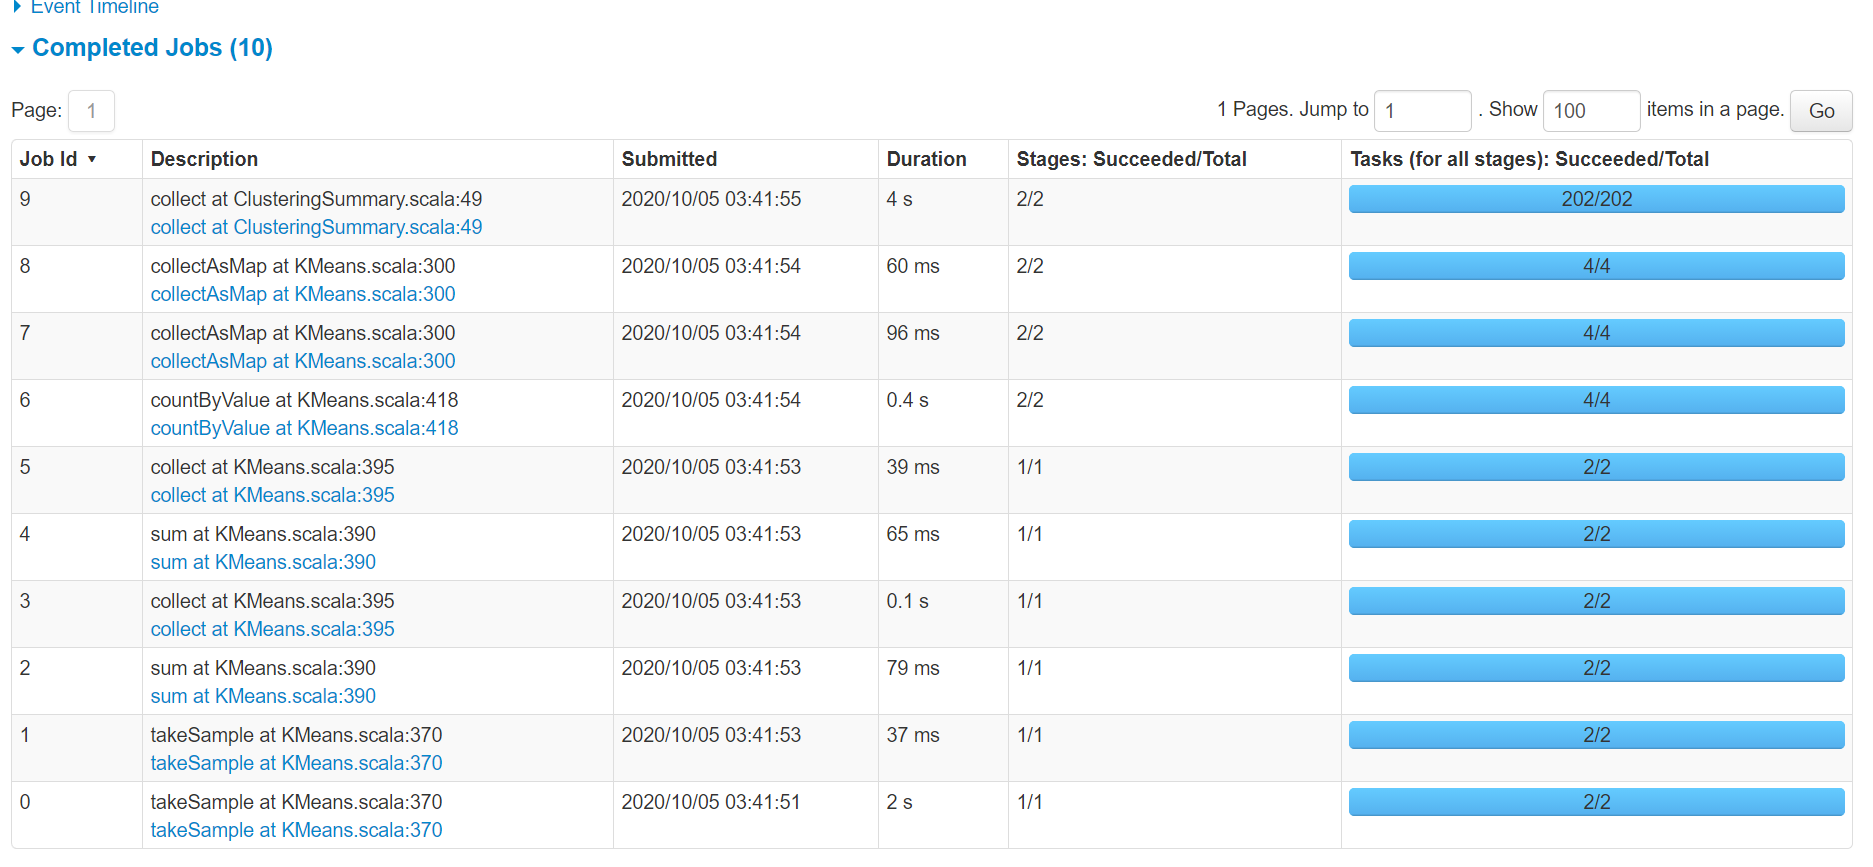

In [1]:
from IPython.display import Image
Image(filename='sparkui.PNG')


The total no of jobs are 10 

### 3.2 

Each job as shown is a processor thread working on each paritition of the data , simulataeously calculating centroid by initially ,samling random values , which are summed together to find centroid of cluster , now each partition has a cluster and each cluster calucaltes  different centroids and finally all these clusters are taken union , hence resulting in final cluster.